# Ceneo Analyzer

## Biblioteki

In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Lista kodów wszystkich produktów, o których zostały pobrane dane

In [11]:
print(*[fname.split('.')[0] for fname in os.listdir('opinions')], sep='\n')

82249489
94103927


## Kod produktu, dla którego ma zosstać wykonana analiza opinni

In [12]:
product_id = input('Podaj kod prodktu w serwisie Ceneo.pl: ')
#94103927

## Wczytanie do obiektu pandas.DataFrame opinii o wskazanym produkcie

In [13]:
opinions = pd.read_json(f"opinions/{product_id}.json")

In [14]:
opinions

,opinion_id,author,recommendation,rating,content,pros,cons,useuful,useless,publish_date,purchase_date
0,18589914,m...a,Polecam,5/5,"Bardzo dobra jakość, duża moc, produkt bardzo ...",[],[],0,0,2024-04-19 19:56:31,2023-12-01 06:42:19
1,10830680,Karol,Polecam,5/5,świetna sprawa. nie rozkładam sie z mikserem p...,[],[],1,2,2019-07-25 07:49:46,2019-07-21 19:20:09
2,11785840,Użytkownik Ceneo,Polecam,"4,5/5",Bardzo dobry,[],[],1,1,2020-02-21 19:13:03,2020-02-15 21:06:22
3,14617970,a...z,Polecam,5/5,Wszystko ok,[],[],0,0,2021-06-18 11:19:19,2021-06-12 20:24:21
4,18601107,a...9,Polecam,5/5,Solidny,[duża moc],[],0,0,2024-04-24 13:35:53,2024-04-12 23:28:32
5,13813807,a...3,Polecam,5/5,Jeszcze nie używałam ale napewno będę zadowolo...,[],[],0,12,2021-01-21 12:24:11,2020-12-28 14:20:41
6,14753019,Mustrum,Nie polecam,"0,5/5",Mikser zepusł się po kilku użyciach mieląć pom...,[duża moc],"[nietrwały, plastikowy, przestał działać]",2,4,2021-07-22 12:49:29,2020-09-30 13:35:33
7,17977692,t0mc,Nie polecam,"0,5/5",Jakość tragiczna. Po kilkukrotnym użyciu wyrob...,[],"[nietrwały, plastikowy]",1,1,2023-10-07 11:25:20,None
8,16190909,Asia,Nie polecam,1/5,"Duże rozczarowanie - po dwóch latach, tuż po u...",[],"[nietrwały, przestał działać]",1,2,2022-06-09 13:25:52,None
9,14022049,Użytkownik Ceneo,Nie polecam,"0,5/5","Tandeta niemiecka popsuła się w nie cały rok,w...",[],[],3,2,2021-02-25 21:50:35,None


## Przekształcanie danych

In [15]:
opinions.rating = opinions.rating.apply(lambda rate: rate.split('/')[0].replace(',', '.')).astype(float)

## Podastwowe statystyki

In [16]:
opinions_count = len(opinions)
pros_count = opinions.pros.astype(bool).sum()
cons_count = opinions.cons.astype(bool).sum()
avg_rating = opinions.rating.mean()
# print(avg_rating)

## Histogram częstości poszczególnych ocen w opiniach o produkcie

[Text(0, 0, ''),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '2'),
 Text(0, 0, '5')]

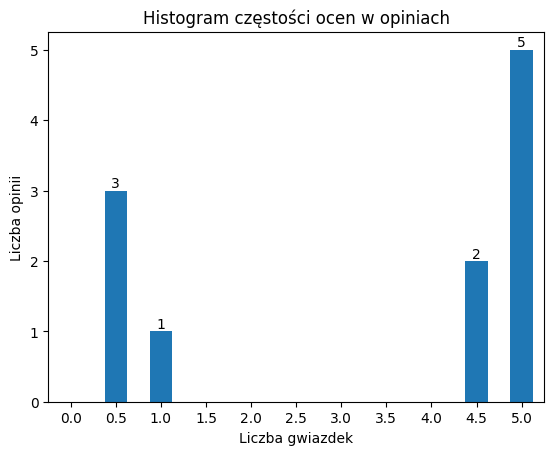

In [17]:
rating_distribution = opinions.rating.value_counts().reindex(np.arange(0,5.2,0.5), fill_value = 0)
# print(rating_distribution)
fig, ax = plt.subplots()
rating_distribution.plot.bar()
plt.xticks(rotation = 0)
plt.xlabel('Liczba gwiazdek')
plt.ylabel('Liczba opinii')
plt.title('Histogram częstości ocen w opiniach')
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: int(x) if x > 0 else '')

## Udział poszczególnych rekomendacji w opiniach

Text(0.5, 1.0, 'Udział rekomendacji w opiniach')

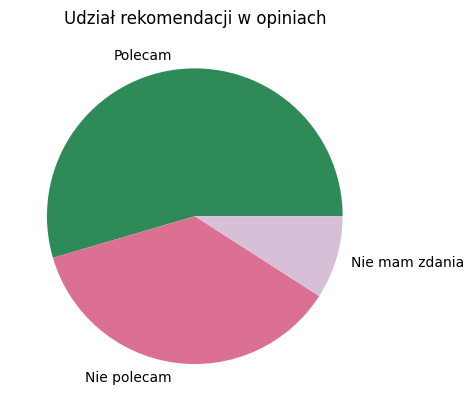

In [18]:
recommendation_distribution = opinions.recommendation.value_counts(dropna=False).reindex(['Polecam', 'Nie polecam', None])
recommendation_distribution.plot.pie(
    label = '',
    colors = ['seagreen', 'palevioletred', 'thistle'],
    labels = ['Polecam', 'Nie polecam', 'Nie mam zdania']
)
plt.title('Udział rekomendacji w opiniach')